# (6주차) 10월14일
> 미니배치

- toc:true
- branch: master
- badges: true
- comments: true
- author: 최규빈

### 강의영상 

> youtube: https://youtube.com/playlist?list=PLQqh36zP38-zv1mREJkdzQc4BYuDmMdox

`-` (1/4) 시험일정 공지 

`-` (2/4) 미니배치 

`-` (3/4) 딥러닝용 컴퓨터를 고르는 요령

`-` (4/4) 과제설명 

### import 

In [1]:
!pip install --upgrade fastai

     |████████████████████████████████| 186 kB 23.0 MB/s 
     |████████████████████████████████| 56 kB 1.8 MB/s 
  Attempting uninstall: fastai
    Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [2]:
import torch
from fastai.vision.all import * 

### Dataset 

In [3]:
X=torch.tensor([3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0])
y=torch.tensor([1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0])

In [4]:
X,y

(tensor([3., 4., 5., 6., 7., 8., 9.]), tensor([1., 0., 1., 0., 1., 1., 0.]))

In [5]:
ds=torch.utils.data.TensorDataset(X,y)

In [6]:
ds ## 그냥 텐서들의 pair ( X 하고 y )

In [7]:
ds.tensors

(tensor([3., 4., 5., 6., 7., 8., 9.]), tensor([1., 0., 1., 0., 1., 1., 0.]))

### DataLoader ( 데이터를 여러 그룹으로 쪼개기 위해 만듦 )

`-` 배치사이즈=2, 셔플= True, 

In [8]:
dl=torch.utils.data.DataLoader(ds,batch_size=2,shuffle=True) # ds 데이터를 섞어서 2씩 나눔 

In [9]:
dl

In [11]:
dir(dl) # 앞뒤에 __가 있는 것은 숨겨진 파일

['_DataLoader__initialized',
 '_DataLoader__multiprocessing_context',
 '_IterableDataset_len_called',
 '__annotations__',
 '__class__',
 '__class_getitem__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_auto_collation',
 '_dataset_kind',
 '_get_iterator',
 '_index_sampler',
 '_iterator',
 'batch_sampler',
 'batch_size',
 'check_worker_number_rationality',
 'collate_fn',
 'dataset',
 'drop_last',
 'generator',
 'multiprocessing_context',
 'num_workers',
 'persistent_workers',
 'pin_memory',
 'prefetch_factor',
 'sampler',
 'timeout',
 'worker_init_fn']

- dl은 배치를 만드는 기능이 있어보임 

In [12]:
for xx,yy in dl: 
    print(xx,yy)

tensor([9., 5.]) tensor([0., 1.])
tensor([6., 8.]) tensor([0., 1.])
tensor([4., 7.]) tensor([0., 1.])
tensor([3.]) tensor([1.])


`-` 배치사이즈=2, 셔플= False

In [13]:
dl=torch.utils.data.DataLoader(ds,batch_size=2,shuffle=False)

In [14]:
for xx,yy in dl: 
    print(xx,yy)

tensor([3., 4.]) tensor([1., 0.])
tensor([5., 6.]) tensor([1., 0.])
tensor([7., 8.]) tensor([1., 1.])
tensor([9.]) tensor([0.])


`-` 배치사이즈=3, 셔플= True

In [15]:
dl=torch.utils.data.DataLoader(ds,batch_size=3,shuffle=True)

In [16]:
for xx,yy in dl: 
    print(xx,yy)

tensor([6., 3., 5.]) tensor([0., 1., 1.])
tensor([9., 8., 4.]) tensor([0., 1., 0.])
tensor([7.]) tensor([1.])


### MNIST 3/7 예제

`-` 우선 텐서로 이루어진 X,y를 만들자. 

In [17]:
path = untar_data(URLs.MNIST_SAMPLE) 

In [18]:
threes=(path/'train'/'3').ls()
sevens=(path/'train'/'7').ls()

In [19]:
seven_tensor = torch.stack([tensor(Image.open(i)) for i in sevens]).float()/255
three_tensor = torch.stack([tensor(Image.open(i)) for i in threes]).float()/255

In [20]:
X=torch.vstack([seven_tensor,three_tensor]).reshape(12396,-1) 
y=torch.tensor([0.0]*6265 + [1.0]*6131).reshape(12396,1) # 형식에 맞추기 위해 12396x1 로 변경 

`-` dataset=(X,y) 를 만들자. 

In [21]:
ds=torch.utils.data.TensorDataset(X,y)

`-` dataloader를 만들자. 

In [22]:
dl=torch.utils.data.DataLoader(ds,batch_size=2048,shuffle=True)

`-` 네트워크(아키텍처), 손실함수, 옵티마이저 

In [24]:
torch.manual_seed(1)
net = torch.nn.Sequential(
    torch.nn.Linear(in_features=784,out_features=30),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=30,out_features=1)
    #torch.nn.Sigmoid() 아래에서 BCEWithLogitsLoss 를 사용했기 때문에 생략 
)
loss_fn=torch.nn.BCEWithLogitsLoss()
optimizer=torch.optim.Adam(net.parameters())

`-` 저번시간 복습

In [25]:
for epoc in range(200):
  ## 1
  yhat = net(X)
  ## 2
  loss = loss_fn(yhat, y)
  ## 3
  loss.backward()
  ## 4
  optimizer.step()
  net.zero_grad()

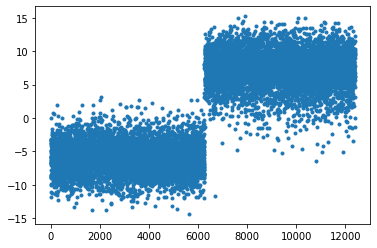

In [26]:
plt.plot(yhat.data,'.')

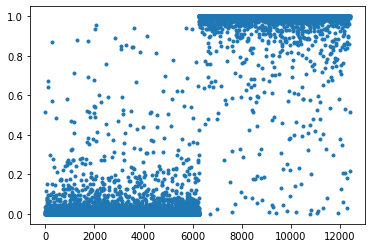

In [27]:
f=torch.nn.Sigmoid() 
plt.plot(f(yhat.data),'.')

`-` 미니배치활용 

In [28]:
torch.manual_seed(1)
net = torch.nn.Sequential(
    torch.nn.Linear(in_features=784,out_features=30),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=30,out_features=1)
    #torch.nn.Sigmoid()
)
loss_fn=torch.nn.BCEWithLogitsLoss()
optimizer=torch.optim.Adam(net.parameters())

- 네트워크 파라메터 다시 초기화

In [29]:
12396 / 2048 

6.052734375

- 총 7개의 미니배치가 만들어질것임 $\to$ 따라서 파라메터를 업데이트하는 횟수는 7 $\times$ epoc 임 (실제적으로는 6 $\times$ epoc) 

In [30]:
200/6

33.333333333333336

In [31]:
for epoc in range(33): 
    for xx,yy in dl:  ### 총 7번돌면 끝나는 for 
        ## 1 
        yyhat=net(xx)
        ## 2 
        loss= loss_fn(yyhat,yy) 
        ## 3 
        loss.backward()
        ## 4 
        optimizer.step()
        net.zero_grad() 

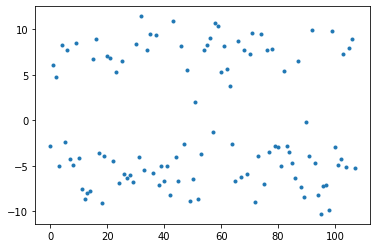

In [32]:
plt.plot(yyhat.data,'.')

- 이게 왜이러지?? 

`-` 배치사이즈를 다시 확인해보자. 

In [33]:
for xx,yy in dl: 
    print(xx.shape,yy.shape)

torch.Size([2048, 784]) torch.Size([2048, 1])
torch.Size([2048, 784]) torch.Size([2048, 1])
torch.Size([2048, 784]) torch.Size([2048, 1])
torch.Size([2048, 784]) torch.Size([2048, 1])
torch.Size([2048, 784]) torch.Size([2048, 1])
torch.Size([2048, 784]) torch.Size([2048, 1])
torch.Size([108, 784]) torch.Size([108, 1])


`-` 마지막이 108개이므로 108개의 y만 그려짐 

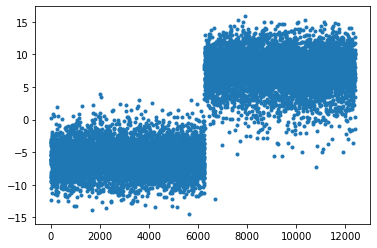

In [34]:
plt.plot(net(X).data,'.')

`-` 2048개 정도만 대충학습해도 동일 반복횟수에 대하여 거의 대등한 효율이 나옴 

`-` GPU에 있는 메모리로 12396개의 데이터를 모두 보내지 않아도 괜찮겠다 $\to$ 그래픽카드의 메모리를 얼마나 큰 것으로 살지는 자료의 크기와는 상관없다. 

`-` net.parameters()에 저장된 값들은 그대로 GPU로 가야만한다. $\to$ 그래픽카드의 메모리를 얼마나 큰것으로 살지는 모형의 복잡도와 관련이 있다. 

***컴퓨터사는방법***
- 메모리: $n$이 큰 자료를 다룰수록 메모리가 커야한다. 
- GPU의 메모리: 모형의 복잡도가 커질수록 GPU의 메모리가 커야한다. 

### 숙제 

`-` batchsize=1024로 바꾼후 학습해보고 결과를 관찰할것 